In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage:

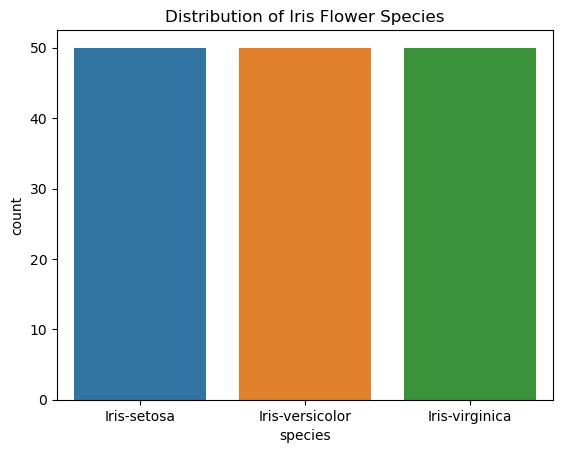

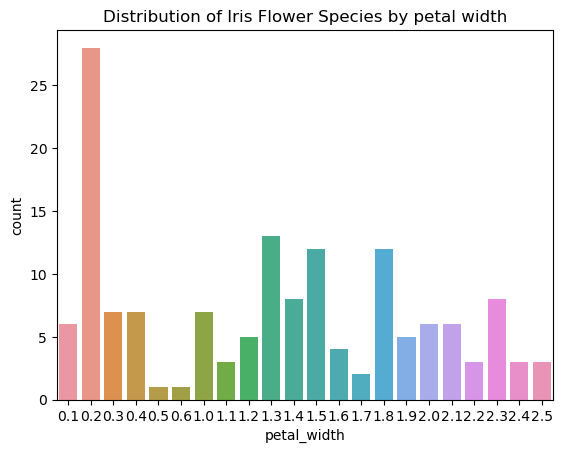

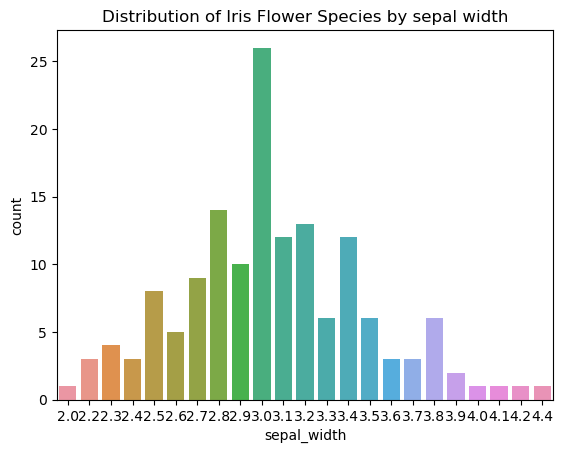

In [5]:
df = pd.read_csv("Iris.csv")

print(df.head(7))

print(df.info())

print(df.isnull().sum())

sns.countplot(x='species', data=df)
plt.title("Distribution of Iris Flower Species")
plt.show()

sns.countplot(x='petal_width', data=df)
plt.title("Distribution of Iris Flower Species by petal width")
plt.show()

sns.countplot(x='sepal_width', data=df)
plt.title("Distribution of Iris Flower Species by sepal width")
plt.show()


In [20]:
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True )   
    
    label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])  

print(df.head())


   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [9]:
X = df.drop('species', axis=1)  
y = df['species']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (120, 4)
Testing data shape: (30, 4)


In [11]:
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)


Accuracy: 1.00

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


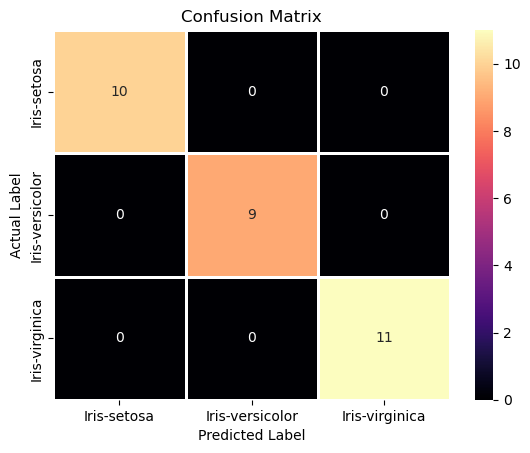

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma',cbar=True,linewidths=1, linecolor='white', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


In [16]:
new_data = pd.DataFrame({
    'sepal_length': [7.1, 5.7],
    'sepal_width': [4.5, 2.0],
    'petal_length': [2.4, 2.2],
    'petal_width': [1.2, 3.3]
})

new_predictions = log_reg.predict(new_data)
predicted_species = label_encoder.inverse_transform(new_predictions) 

print("Predicted Species:", predicted_species)


Predicted Species: ['Iris-setosa' 'Iris-versicolor']
